In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #supress warnings
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#data reading
data = pd.DataFrame(pd.read_excel(r'C:/Users/asmab/Downloads/research.xlsx'))
data.head()

,Gender,Age,Educational Qualification,Do you use social media?,Social media sites explore,How long have you been using social media?,Hours spent per day,Login pattern,Concern regarding the confidentiality and privacy of information,Purpose of use,...,What attracts you towards brand through social media/network marketing?,Kind of purchase,Do you use social media to compare products/ services/ brands?,Preferred online retailer,From where did you hear about the online retailer you selected in the above question?,Advertisements are relevant or not,How frequently do you purchase products/service based on the advertisement clicked?,Rating of Online shoppping,Mode of payment,Area of Residence
0,Female,26-30 Years,Post Graduate,Yes,"Facebook, Instagram, LinkedIn",More than 2 years,2 – 3 hours,Several times a day,Maybe,Socializing,...,Brand Information,Clothes,Yes,Myntra,Social networking/Media,Maybe,Rarely,Satisfy,Credit Card/Debit Card,Urban Area
1,Male,More than 30 years,Post Graduate,Yes,"Facebook, LinkedIn",More than 2 years,1 – 2 hours,Occassionally,Yes,Connecting with family and friends,...,Nothing,NaN,No,NaN,NaN,No,Never,Dissatisfy,Credit Card/Debit Card,Metro City
2,Female,22-26 Years,Post Graduate,Yes,"Instagram, Snapchat, LinkedIn",More than 2 years,1 – 2 hours,Several times a day,Yes,Connecting with family and friends,...,Brand Information,Other,Yes,Myntra,Google or other search engines,Maybe,Never,Neutral,Credit Card/Debit Card,Metro City
3,Male,22-26 Years,Post Graduate,Yes,"Facebook, Twitter, Instagram, Snapchat, TikTok...",More than 2 years,2 – 3 hours,Several times a day,Yes,Information,...,Loyalty towards brand,Other,Yes,Amazon,Google or other search engines,No,Rarely,Neutral,Credit Card/Debit Card,Metro City
4,Male,22-26 Years,Graduate,Yes,"Facebook, Instagram, Snapchat, LinkedIn",More than 2 years,More than 3 hours,Always connected,Yes,Socializing,...,Promotional offers such as discounts and coupons,Clothes,No,Myntra,Friends/Family,Yes,Rarely,Neutral,UPI,Metro City


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Gender                                                                                  104 non-null    object
 1   Age                                                                                     104 non-null    object
 2   Educational Qualification                                                               104 non-null    object
 3   Do you use social media?                                                                104 non-null    object
 4   Social media sites explore                                                              103 non-null    object
 5   How long have you been using social media?                                    

In [4]:
#removing rows having missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 103
Data columns (total 21 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Gender                                                                                  93 non-null     object
 1   Age                                                                                     93 non-null     object
 2   Educational Qualification                                                               93 non-null     object
 3   Do you use social media?                                                                93 non-null     object
 4   Social media sites explore                                                              93 non-null     object
 5   How long have you been using social media?                                          

In [5]:
#converting categorical data to numeric data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = data.apply(le.fit_transform)
df.head()

,Gender,Age,Educational Qualification,Do you use social media?,Social media sites explore,How long have you been using social media?,Hours spent per day,Login pattern,Concern regarding the confidentiality and privacy of information,Purpose of use,...,What attracts you towards brand through social media/network marketing?,Kind of purchase,Do you use social media to compare products/ services/ brands?,Preferred online retailer,From where did you hear about the online retailer you selected in the above question?,Advertisements are relevant or not,How frequently do you purchase products/service based on the advertisement clicked?,Rating of Online shoppping,Mode of payment,Area of Residence
0,0,2,2,1,2,3,1,4,0,4,...,0,1,1,3,2,0,3,2,1,2
2,0,1,2,1,19,3,0,4,2,0,...,0,6,1,3,1,0,1,1,1,0
3,1,1,2,1,15,3,1,4,2,3,...,2,6,1,1,1,1,3,1,1,0
4,1,1,0,1,6,3,3,0,2,4,...,4,1,0,3,0,2,3,1,4,0
5,1,2,0,1,10,3,2,3,2,3,...,3,3,0,1,0,1,1,2,1,0


In [6]:
#checking for duplicate values
df.duplicated().sum()

0

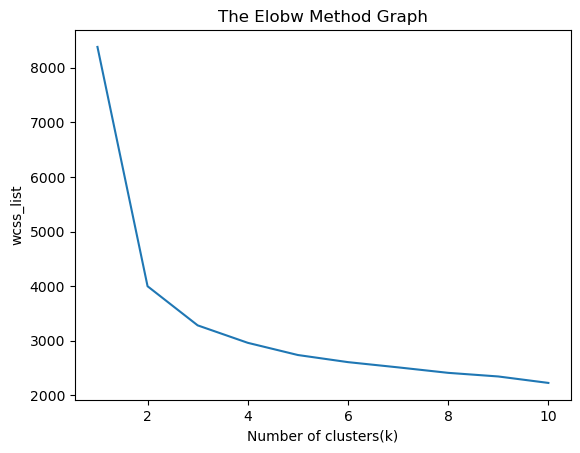

In [7]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [8]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df) 

In [9]:
df.insert(0, "Cluster", y_predict, True)
df

,Cluster,Gender,Age,Educational Qualification,Do you use social media?,Social media sites explore,How long have you been using social media?,Hours spent per day,Login pattern,Concern regarding the confidentiality and privacy of information,...,What attracts you towards brand through social media/network marketing?,Kind of purchase,Do you use social media to compare products/ services/ brands?,Preferred online retailer,From where did you hear about the online retailer you selected in the above question?,Advertisements are relevant or not,How frequently do you purchase products/service based on the advertisement clicked?,Rating of Online shoppping,Mode of payment,Area of Residence
0,1,0,2,2,1,2,3,1,4,0,...,0,1,1,3,2,0,3,2,1,2
2,0,0,1,2,1,19,3,0,4,2,...,0,6,1,3,1,0,1,1,1,0
3,0,1,1,2,1,15,3,1,4,2,...,2,6,1,1,1,1,3,1,1,0
4,1,1,1,0,1,6,3,3,0,2,...,4,1,0,3,0,2,3,1,4,0
5,1,1,2,0,1,10,3,2,3,2,...,3,3,0,1,0,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,0,3,0,1,0,3,1,0,2,...,3,6,0,1,0,0,3,1,0,2
99,0,0,1,2,1,17,3,0,3,0,...,4,3,1,3,2,2,0,2,4,0
101,1,0,3,2,1,1,3,1,3,2,...,3,5,1,2,2,0,3,2,0,0
102,0,1,3,0,1,16,1,2,3,0,...,0,2,1,1,2,0,4,1,1,2


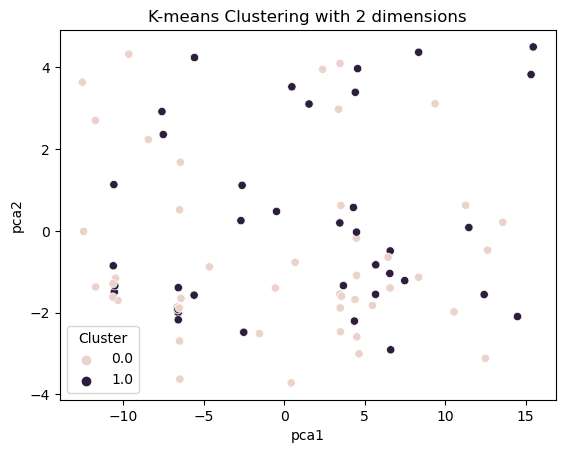

In [10]:
#Run PCA on the data and reduce the dimensions for visualisation

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()